## Task 1: Prediction using Supervised ML

Predict the percentage of a student based on the no. of hours studied

#### Notebook by: Himanshu Jadon

### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.metrics import max_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [4]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking dataset for null values

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Splitting dataset into train and test

In [85]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


### Using dummy regressor as a baseline model

In [132]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test, y_test)

-0.056811955355065225

### Model preparation using Linear Regression 

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)

print("Weights of the linear regression: ", lin_reg.coef_)
print("Intercept of linear regression: ", lin_reg.intercept_)

print('Mean squared error: ', mean_squared_error(y_train, y_pred_train))
print('R2 score: ', r2_score(y_train, y_pred_train))

lin_reg.score(X_test, y_test)
train_error = max_error(y_train, y_pred_train)
print("Max error: ",train_error)

Weights of the linear regression:  [[9.71054094]]
Intercept of linear regression:  [2.79419668]
Mean squared error:  31.398307995353253
R2 score:  0.9536486503889446
Max error:  10.333794636092733


### Plotting Linear Regression model along with the dataset

Text(0, 0.5, 'Score')

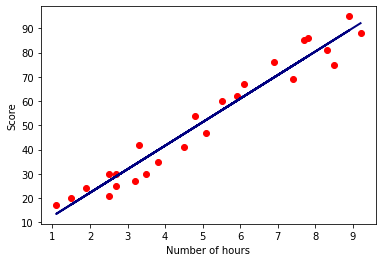

In [134]:
plt.scatter(X, y,color='red')
plt.plot(X_train, y_pred_train, linewidth=2, color='navy')
plt.xlabel('Number of hours')
plt.ylabel('Score')

### Predicting labels using Linear Regression Model

In [135]:
y_predict = lin_reg.predict(X)
y_predict
y = y.reshape([-1,1])

In [136]:
actual_score_x = np.concatenate((X,y),axis=1)
predicted_score_x= np.concatenate((X,y_predict),axis=1)
predicted_score = pd.DataFrame(predicted_score_x, columns=['Hours','Predicted_score'])
actual_score = pd.DataFrame(actual_score_x, columns=['Hours','Actual_score'])

### Comparing Actual and Predicted Scores using bar plot

<AxesSubplot:xlabel='Hours'>

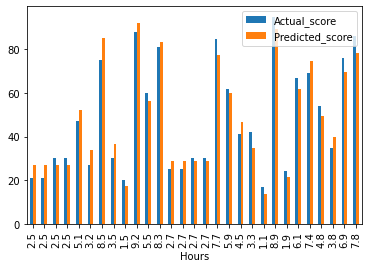

In [137]:
final_df = pd.merge(actual_score,predicted_score,on='Hours')
final_df.plot.bar(x='Hours')

### Predicted score for feature value = 9.25hr

In [140]:
y_final = (np.array([9.25])).reshape(-1,1)
pred_value = lin_reg.predict(y_final)
pred_value

array([[92.61670034]])

## So, the predicted score if a student studies for 9.25hrs/day is 92.616

### Thank You 